In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
%matplotlib inline

In [ ]:
df=pd.read_csv(r'/content/USA_Housing.csv')
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

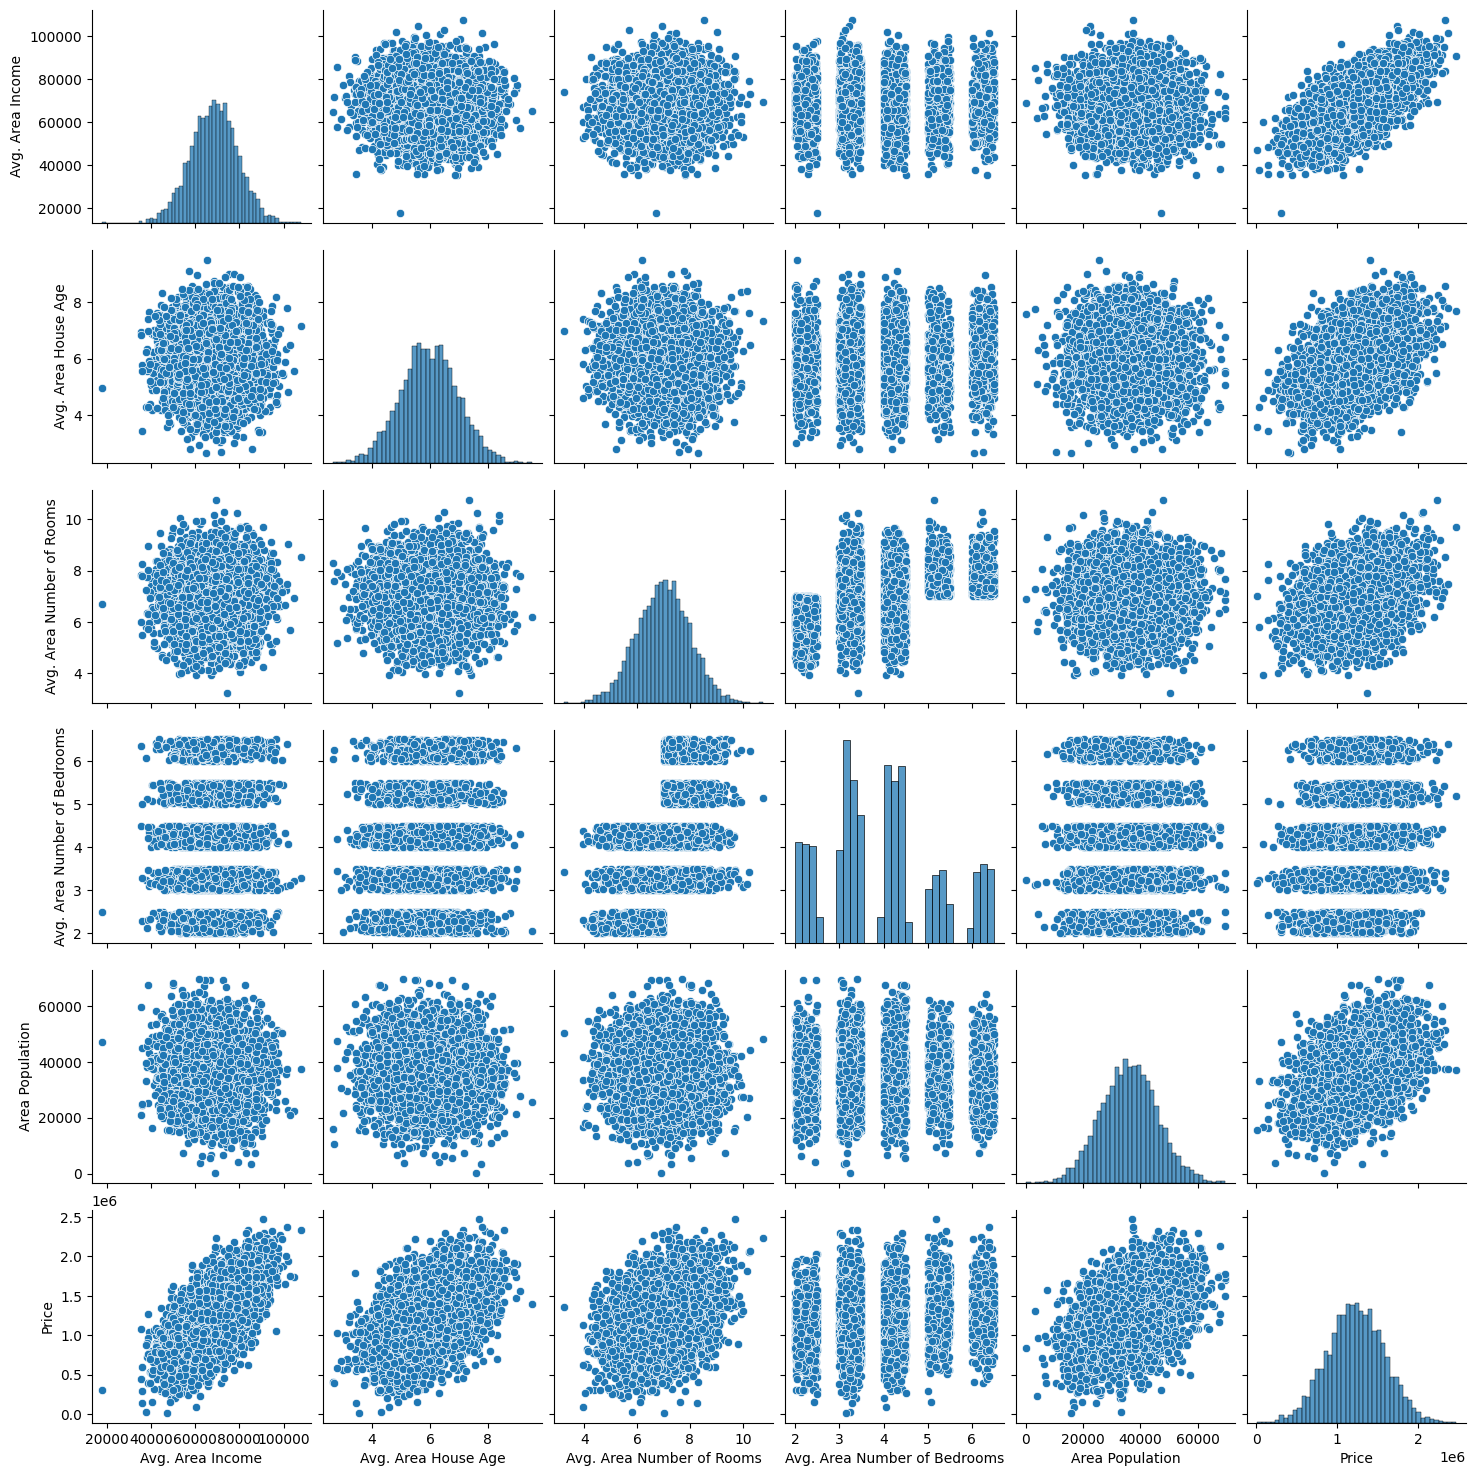

In [ ]:
sns.pairplot(df)

<Axes: ylabel='Frequency'>

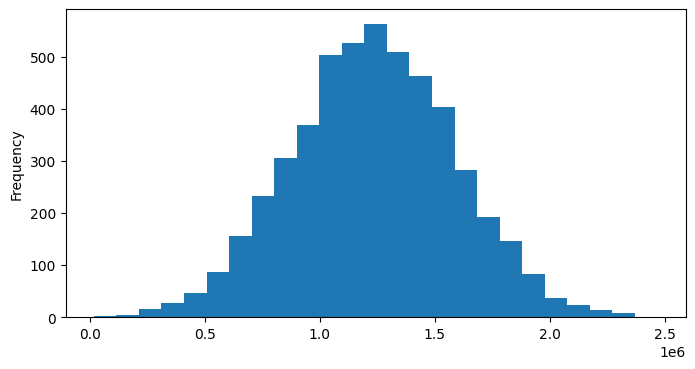

In [ ]:
df['Price'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

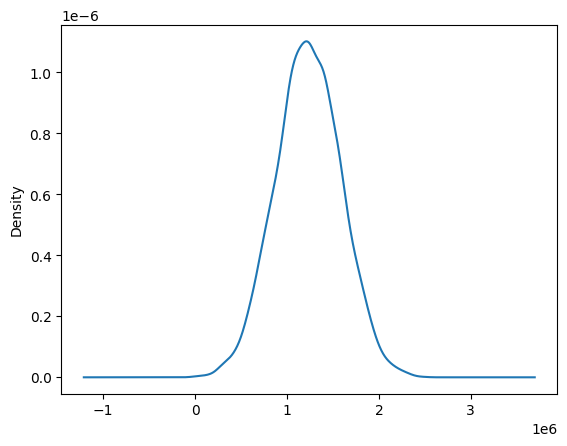

In [ ]:
df['Price'].plot.density()

In [ ]:
# Konversi kolom numerik ke tipe data yang sesuai
numeric_columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                   'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Hitung matriks korelasi
correlation_matrix = numeric_df.corr()

print("\nMatriks Korelasi:")
print(correlation_matrix)


Matriks Korelasi:
                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Popu

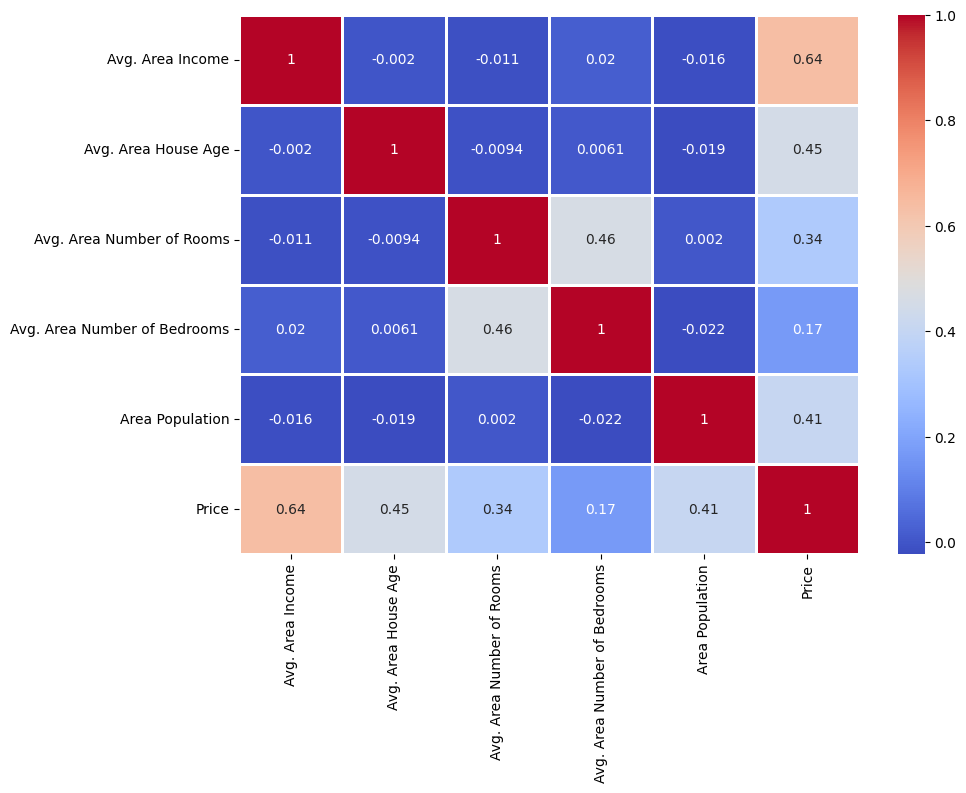

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2)
plt.show()

In [ ]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column)  # Length of column vector list
l_column


['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

In [ ]:
x = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]

print("Feature set size:",x.shape)
print("Variable set size:",y.shape)

Feature set size: (5000, 5)
Variable set size: (5000,)


In [ ]:
x.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09     23086.800503  
1                          3.09     40173.072174  
2                          5.13     36882.159400  
3                          3.26     34310.242831  
4                          4.23     26354.109472

In [ ]:
from sklearn.model_selection import train_test_split
%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 5)
Test feature set size: (1500, 5)
Training variable set size: (3500,)
Test variable set size: (1500,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

lm = LinearRegression() # Creating a Linear Regression object 'lm'

lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another v

print("The intercept term of the linear model:", lm.intercept_)

print("The coefficients of the linear model:", lm.coef_)

#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict, index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

The intercept term of the linear model: -2635072.900933358
The coefficients of the linear model: [2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]


Coefficients
Avg. Area Income                  21.652206
Avg. Area House Age           164666.480722
Avg. Area Number of Rooms     119624.012232
Avg. Area Number of Bedrooms    2440.377611
Area Population                   15.270313

In [ ]:

n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square (X_train[list(X_train.columns) [i]]-X_train[list(X_train.columns) [i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

Coefficients  Standard Error  t-statistic
Avg. Area Income                  21.652206        0.149705   144.632920
Avg. Area House Age           164666.480722     1612.910628   102.092750
Avg. Area Number of Rooms     119624.012232     1587.666709    75.345796
Avg. Area Number of Bedrooms    2440.377611     1306.675115     1.867624
Area Population                   15.270313        0.160719    95.012274

Text(0.5, 1.0, 'Area Population vs. Price')

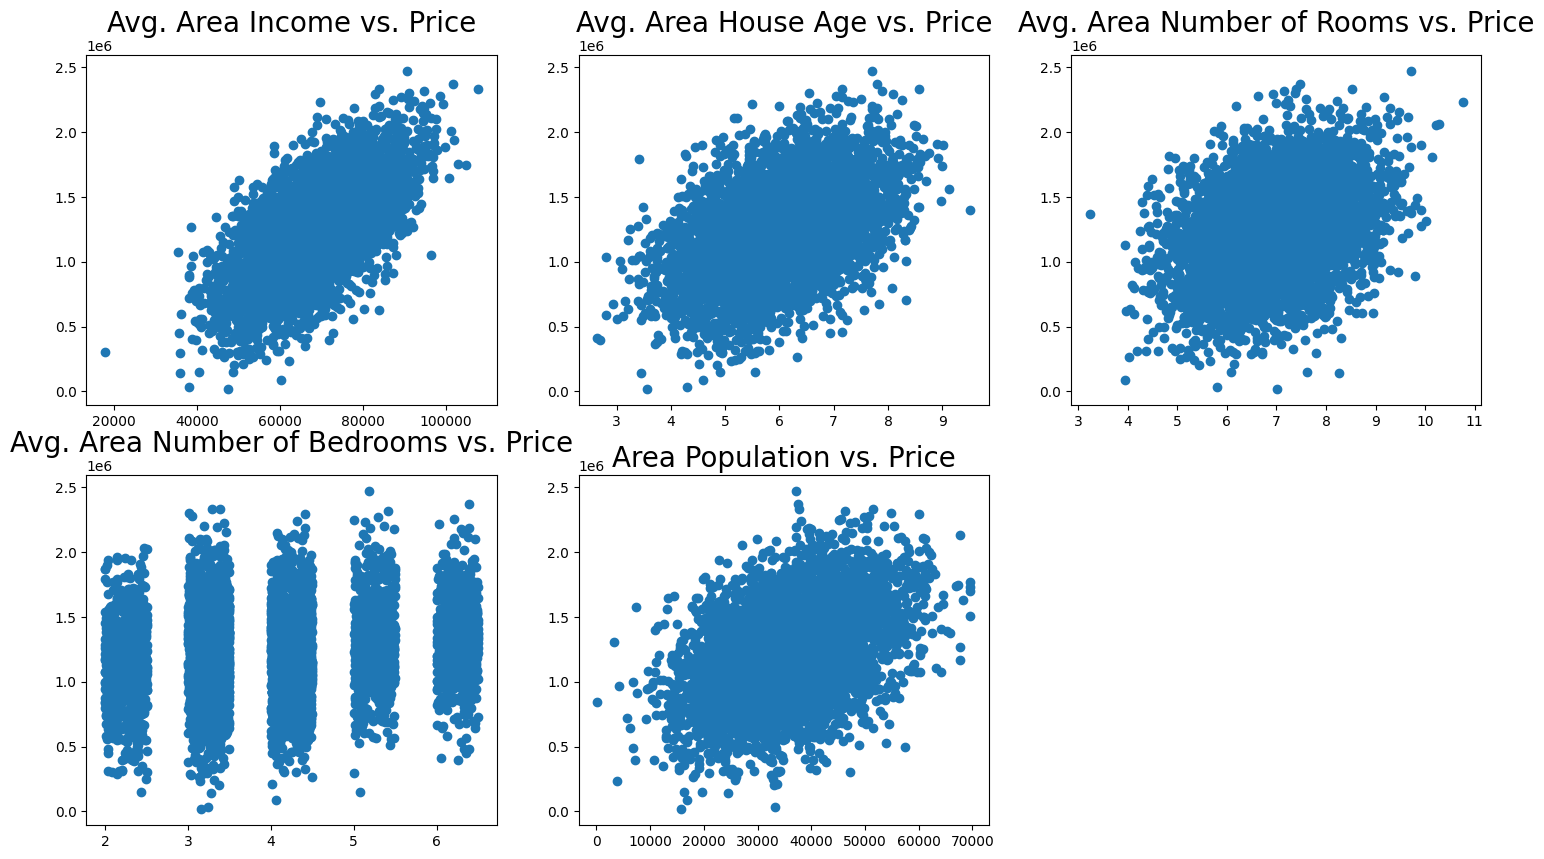

In [ ]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(1), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]],df['Price'])
ax0.set_title(l[0]+" vs. Price", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['Price'])
ax1.set_title(l[1]+" vs. Price", fontdict={'fontsize': 20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['Price'])
ax2.set_title(l[2]+" vs. Price", fontdict={'fontsize':20})

ax3= plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['Price'])
ax3.set_title(l[3]+" vs. Price", fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]],df['Price'])
ax4.set_title(l[4]+" vs. Price", fontdict={'fontsize':20})

In [ ]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1000,)


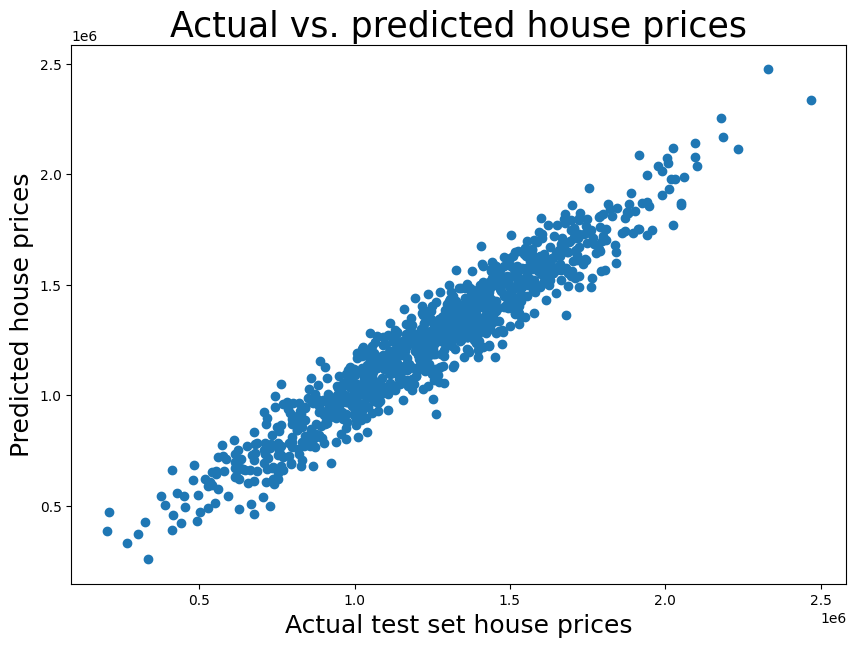

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices", fontsize=25)
plt.xlabel("Actual test set house prices", fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)

<ipython-input-134-4bda0ce81bb3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-predictions])


<Axes: title={'center': 'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

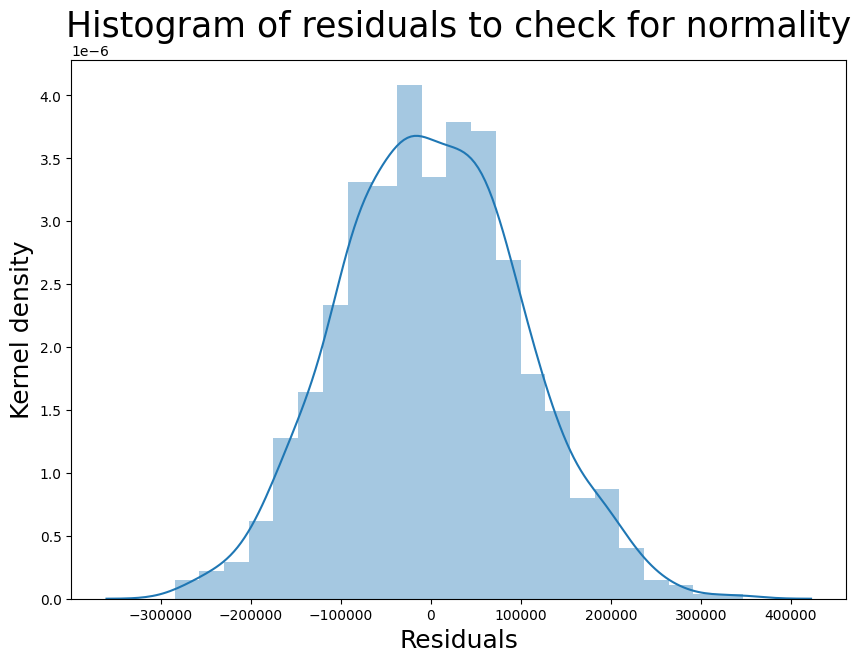

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality", fontsize=25)
plt.xlabel("Residuals", fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot([y_test-predictions])

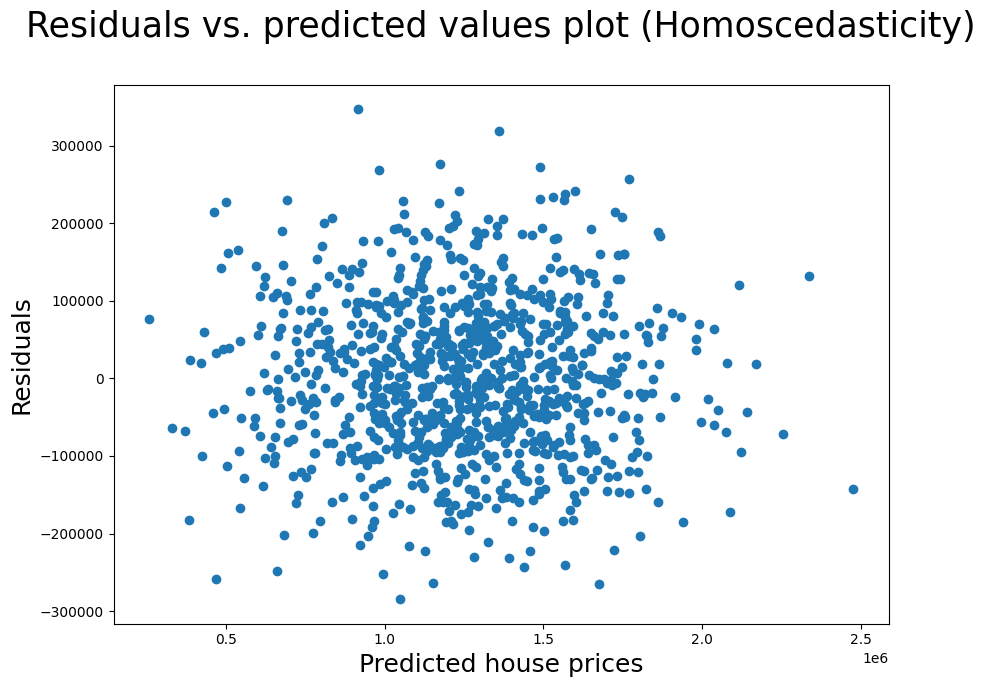

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n", fontsize=25)
plt.xlabel("Predicted house prices", fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

In [ ]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test, predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean absolute error (MAE): 80879.0972348982
Mean square error (MSE): 10089009300.894518
Root mean square error (RMSE): 100444.06055558745
